# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

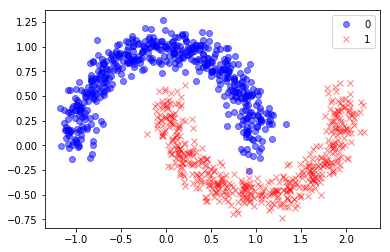

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


### Shallow Model

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 352us/step


In [10]:
results

[0.3183281054099401, 0.8433333341280619]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.843


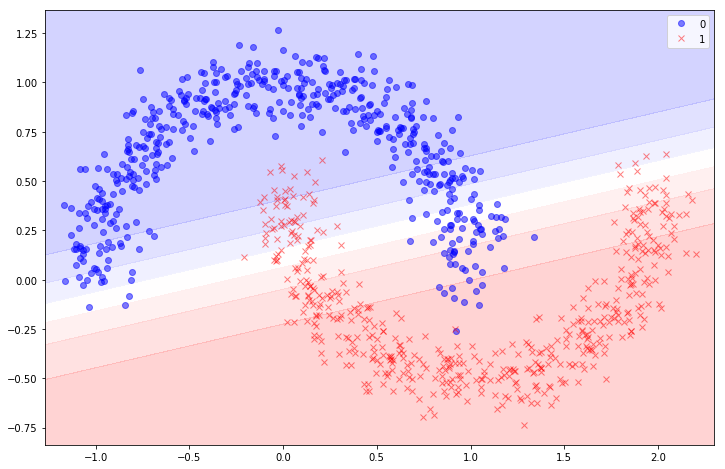

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [13]:
model = Sequential()
model.add(Dense(3, input_shape=(2,), activation='tanh'))
# model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 631us/step


[0.0024828475651641688, 1.0]

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


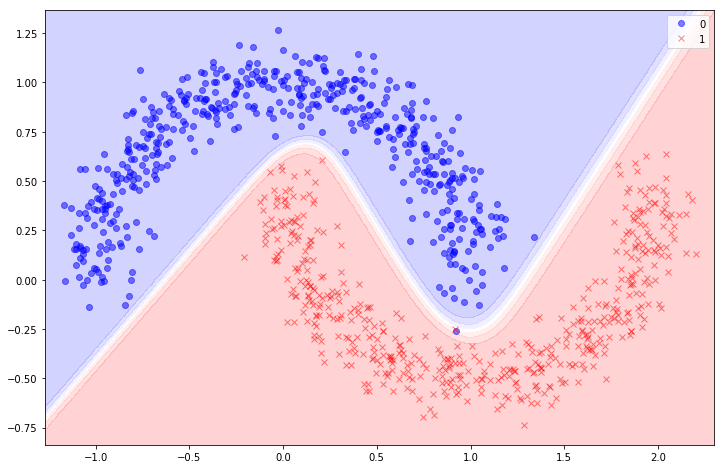

In [18]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [19]:
df = pd.read_csv('../data/iris.csv')

/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


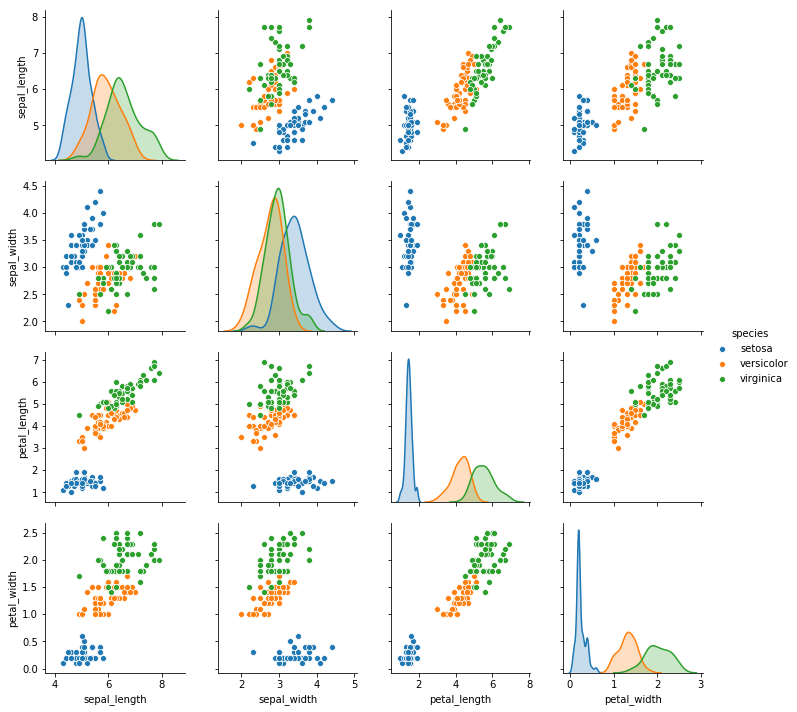

In [20]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [24]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [25]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [26]:
from keras.utils.np_utils import to_categorical

In [27]:
y_cat = to_categorical(y, dtype='float')

In [28]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [30]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 1s 5ms/step - loss: 1.4207 - acc: 0.3519 - val_loss: 1.8979 - val_acc: 0.0000e+00
Epoch 2/20
108/108 [==============================] - 0s 280us/step - loss: 1.0991 - acc: 0.4074 - val_loss: 0.8671 - val_acc: 0.5833
Epoch 3/20
108/108 [==============================] - 0s 246us/step - loss: 0.6561 - acc: 0.6944 - val_loss: 0.8042 - val_acc: 0.4167
Epoch 4/20
108/108 [==============================] - 0s 164us/step - loss: 0.5855 - acc: 0.6944 - val_loss: 0.7703 - val_acc: 0.4167
Epoch 5/20
108/108 [==============================] - 0s 156us/step - loss: 0.5457 - acc: 0.7963 - val_loss: 0.4979 - val_acc: 0.9167
Epoch 6/20
108/108 [==============================] - 0s 186us/step - loss: 0.4457 - acc: 0.9074 - val_loss: 0.5768 - val_acc: 0.5000
Epoch 7/20
108/108 [==============================] - 0s 142us/step - loss: 0.4403 - acc: 0.7315 - val_loss: 0.5146 - val_acc: 0.6667
Epoch 8/20
108/

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred[:5]
# y_test[:5]
# y_pred.argmax(axis=1)

array([[9.73423243e-01, 2.65377425e-02, 3.89956185e-05],
       [9.58675802e-01, 4.12225686e-02, 1.01571626e-04],
       [3.38278338e-02, 6.66595876e-01, 2.99576283e-01],
       [4.29097767e-04, 1.29340410e-01, 8.70230496e-01],
       [8.98658991e-01, 1.00678965e-01, 6.62085367e-04]], dtype=float32)

In [34]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.80      0.89        10
           2       0.80      1.00      0.89         8

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



In [37]:
confusion_matrix(y_test_class, y_pred_class)

array([[12,  0,  0],
       [ 0,  8,  2],
       [ 0,  0,  8]])

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [38]:
import pandas as pd
df = pd.read_csv('../data/diabetes.csv')

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


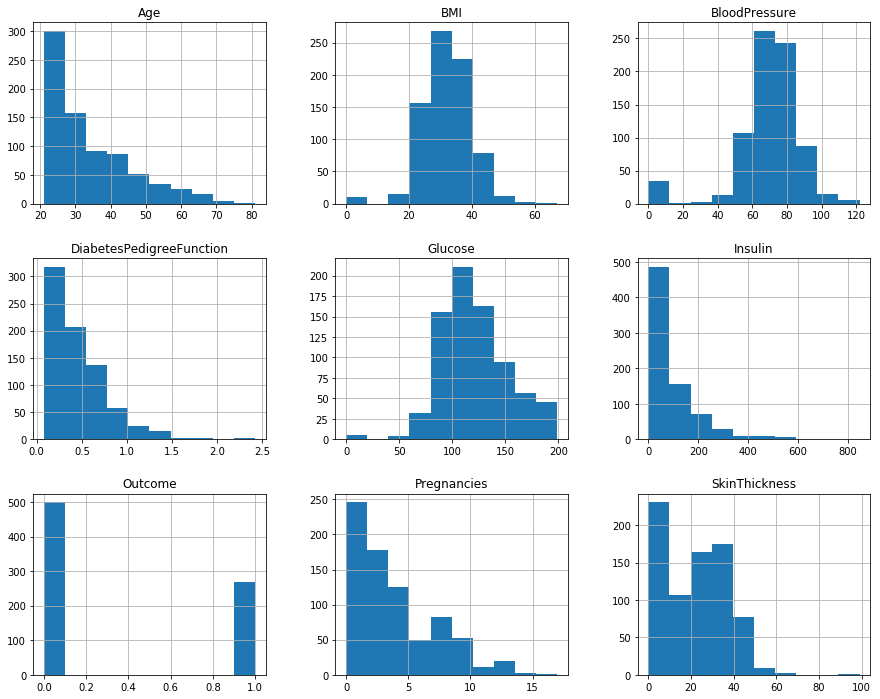

In [42]:
import matplotlib.pyplot as plt
def plot_hist_ex1():
    df.hist(figsize=(15,12))
#     plt.subplots(2, 4, figsize=(14,6))
#     for i, feature in enumerate(df.columns.drop('Outcome')):
#         plt.subplot(2, 4, i+1)
#         df[feature].plot(kind='hist', title=feature)
#     plt.tight_layout()
plot_hist_ex1()

In [43]:
original_df = df

In [44]:
# normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def rescale_features(df, scaler, *features):
    sdf = pd.DataFrame()
    for feature in features:
        sdf[feature] = scaler.fit_transform(df[[feature]]).ravel()
    return sdf
# df = rescale_features(df, MinMaxScaler(), *df.columns)
df = rescale_features(df, StandardScaler(), *original_df.columns.drop('Outcome'))
df['Outcome'] = original_df['Outcome']
df.describe().round(2)

/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/prepr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
min,-1.14,-3.78,-3.57,-1.29,-0.69,-4.06,-1.19,-1.04,0.00
25%,-0.84,-0.69,-0.37,-1.29,-0.69,-0.60,-0.69,-0.79,0.00
50%,-0.25,-0.12,0.15,0.15,-0.43,0.00,-0.30,-0.36,0.00
75%,0.64,0.61,0.56,0.72,0.41,0.58,0.47,0.66,1.00
max,3.91,2.44,2.73,4.92,6.65,4.46,5.88,4.06,1.00


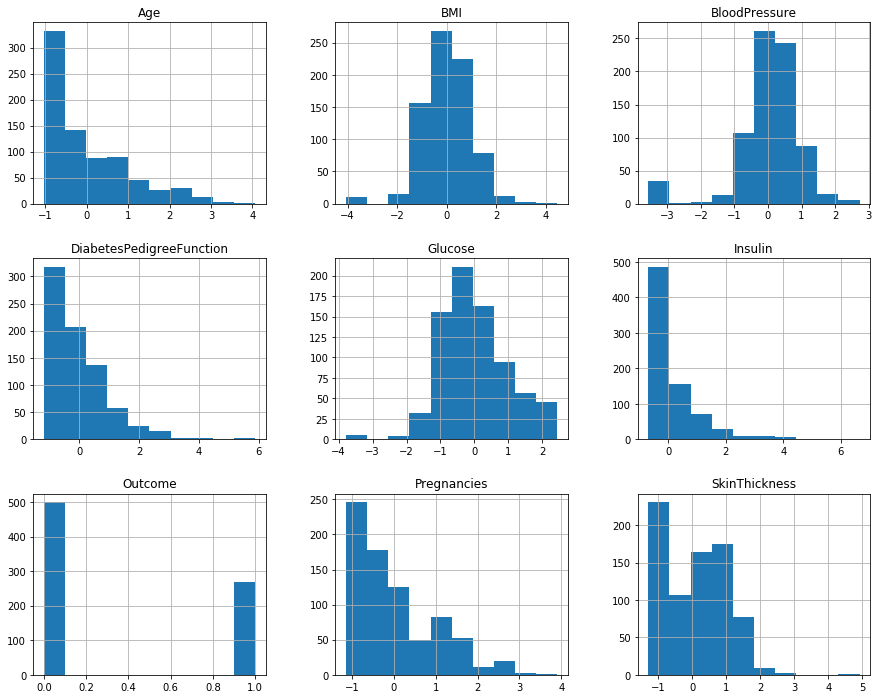

In [45]:
plot_hist_ex1()

In [46]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return u

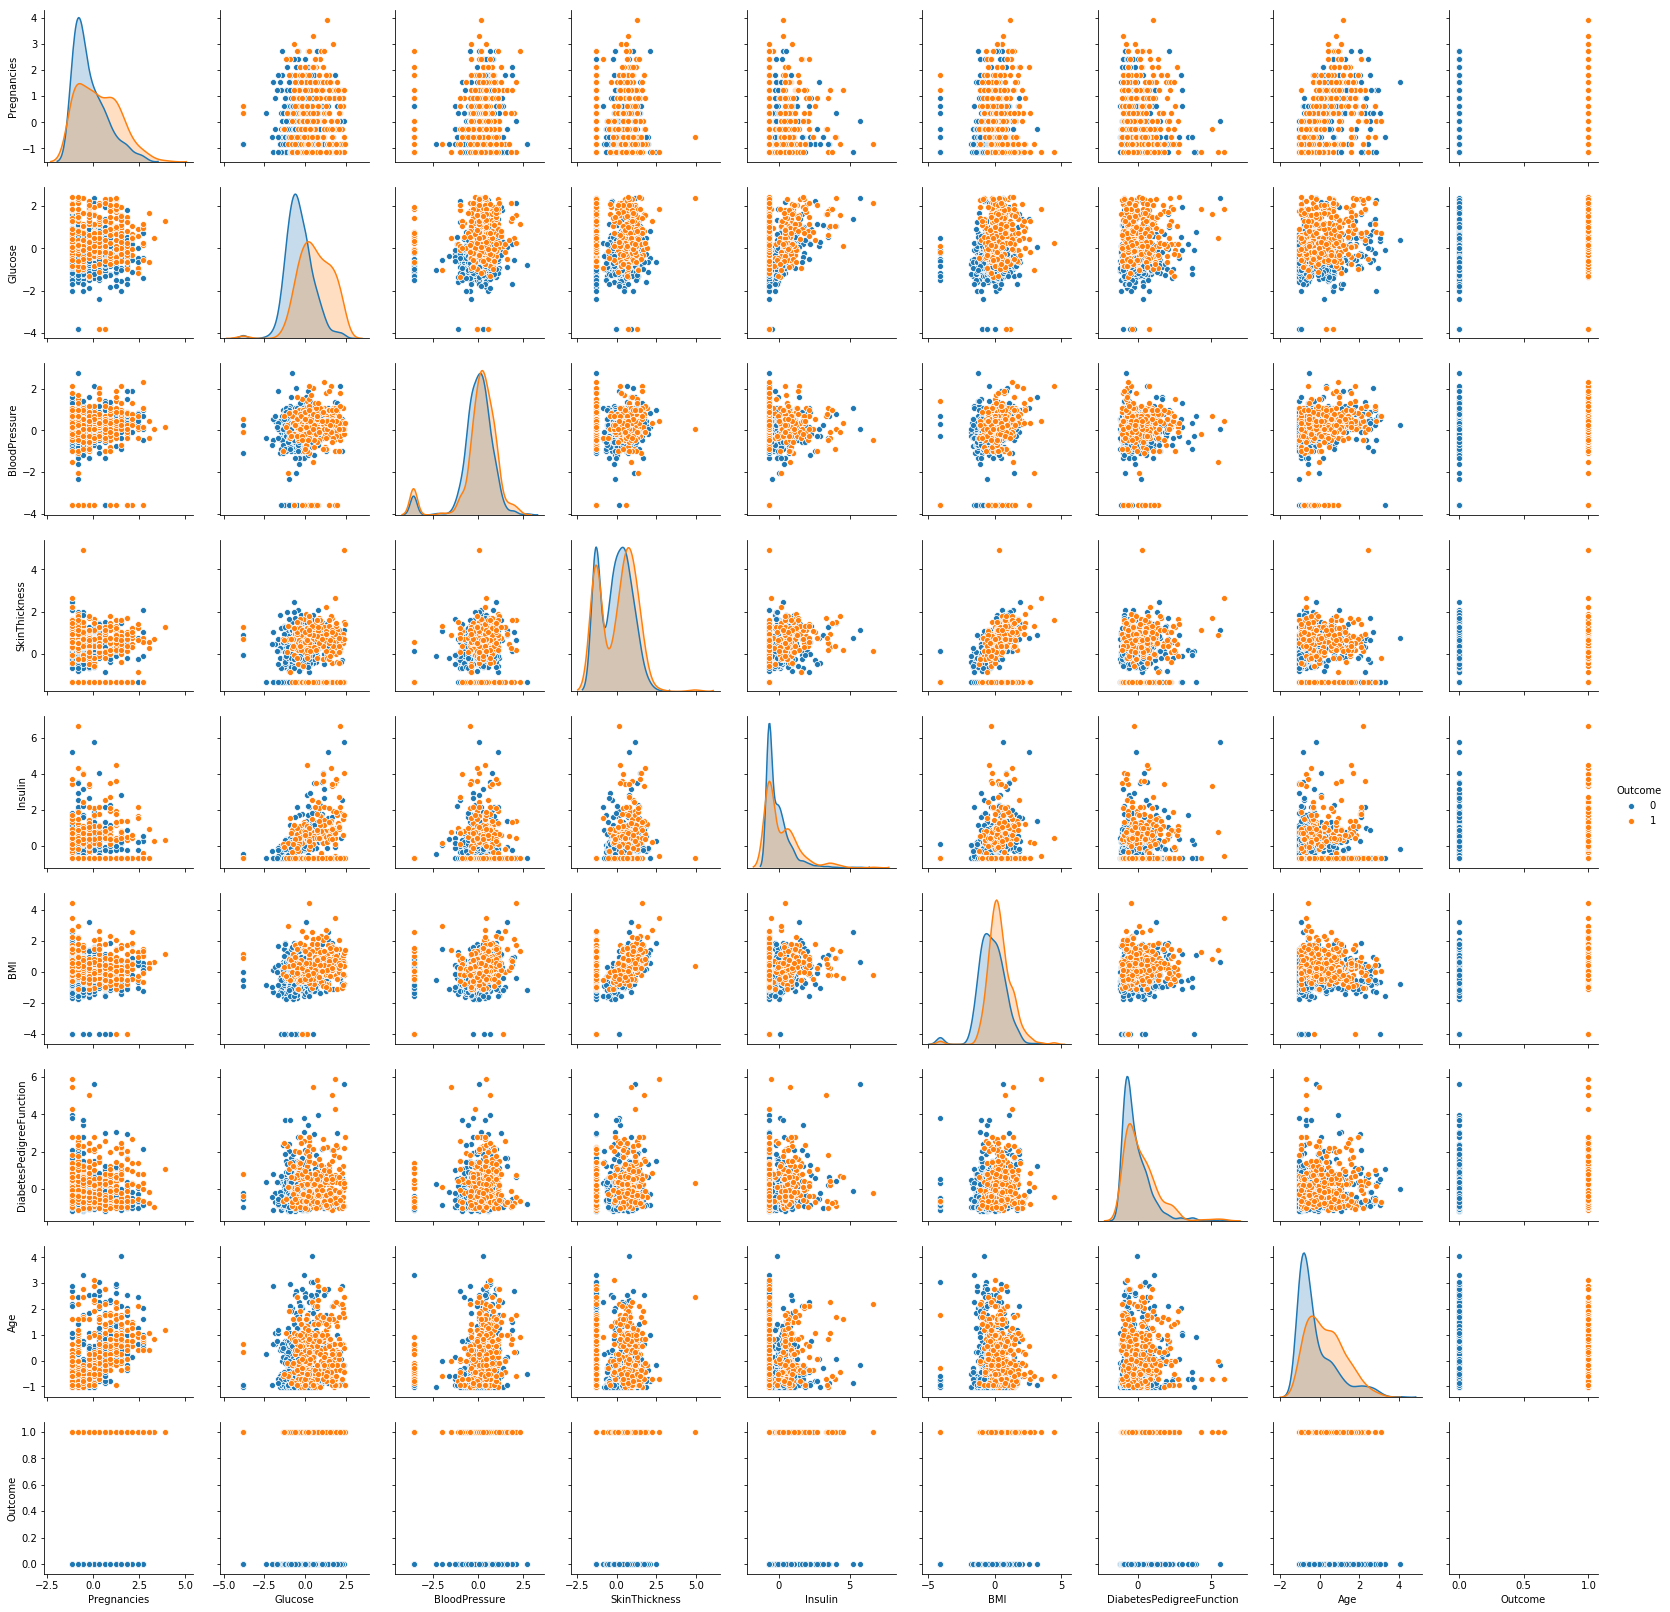

In [47]:
# _ = pd.scatter_matrix(df.drop(columns=['Outcome']), figsize=(12,12))

import seaborn as sns
sns.pairplot(df, hue='Outcome')

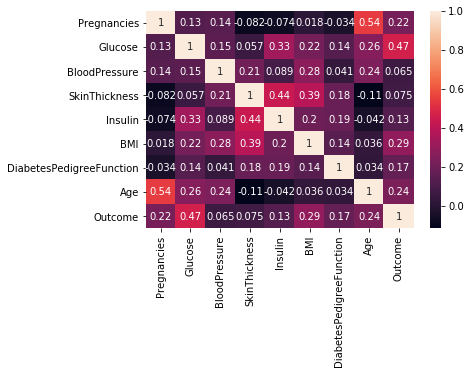

In [48]:
sns.heatmap(df.corr(), annot=True)

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [49]:
# indices = df.columns.drop('Outcome')
indices = ["Glucose","Insulin","BMI","Age"]
X, y = df[indices].values, df['Outcome'].values
# y = to_categorical(y)
X[0:5]

array([[ 0.84832379, -0.69289057,  0.20401277,  1.4259954 ],
       [-1.12339636, -0.69289057, -0.68442195, -0.19067191],
       [ 1.94372388, -0.69289057, -1.10325546, -0.10558415],
       [-0.99820778,  0.12330164, -0.49404308, -1.04154944],
       [ 0.5040552 ,  0.76583594,  1.4097456 , -0.0204964 ]])

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
def build_ex1_model(features=8, learn_rate=0.05):
    model = Sequential()
    model.add(Dense(32, input_shape=(features,), activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=learn_rate), loss='binary_crossentropy', metrics=['accuracy'])
#     model.add(Dense(2, activation='softmax'))
#     model.compile(optimizer=Adam(lr=learn_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = build_ex1_model(features=X.shape[1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [52]:
model.fit(X_train, y_train, epochs=200, validation_split=0.1, verbose=1)

Train on 552 samples, validate on 62 samples
Epoch 1/200
552/552 [==============================] - 1s 2ms/step - loss: 0.5503 - acc: 0.7283 - val_loss: 0.5632 - val_acc: 0.7419
Epoch 2/200
552/552 [==============================] - 0s 78us/step - loss: 0.5609 - acc: 0.7482 - val_loss: 0.5141 - val_acc: 0.7903
Epoch 3/200
552/552 [==============================] - 0s 78us/step - loss: 0.5230 - acc: 0.7717 - val_loss: 0.5111 - val_acc: 0.7903
Epoch 4/200
552/552 [==============================] - 0s 72us/step - loss: 0.5291 - acc: 0.7609 - val_loss: 0.5290 - val_acc: 0.7742
Epoch 5/200
552/552 [==============================] - 0s 48us/step - loss: 0.5279 - acc: 0.7500 - val_loss: 0.5421 - val_acc: 0.7742
Epoch 6/200
552/552 [==============================] - 0s 57us/step - loss: 0.5275 - acc: 0.7373 - val_loss: 0.5418 - val_acc: 0.7258
Epoch 7/200
552/552 [==============================] - 0s 59us/step - loss: 0.5328 - acc: 0.7283 - val_loss: 0.5593 - val_acc: 0.6613
Epoch 8/200
552/55

552/552 [==============================] - 0s 59us/step - loss: 0.4986 - acc: 0.7482 - val_loss: 0.5374 - val_acc: 0.6935
Epoch 62/200
552/552 [==============================] - 0s 77us/step - loss: 0.5318 - acc: 0.7192 - val_loss: 0.5531 - val_acc: 0.6935
Epoch 63/200
552/552 [==============================] - 0s 75us/step - loss: 0.5155 - acc: 0.7428 - val_loss: 0.5591 - val_acc: 0.6774
Epoch 64/200
552/552 [==============================] - 0s 55us/step - loss: 0.5119 - acc: 0.7428 - val_loss: 0.5455 - val_acc: 0.6935
Epoch 65/200
552/552 [==============================] - 0s 53us/step - loss: 0.5215 - acc: 0.6902 - val_loss: 0.5157 - val_acc: 0.7581
Epoch 66/200
552/552 [==============================] - 0s 74us/step - loss: 0.5476 - acc: 0.7337 - val_loss: 0.5597 - val_acc: 0.7581
Epoch 67/200
552/552 [==============================] - 0s 70us/step - loss: 0.5397 - acc: 0.7355 - val_loss: 0.5320 - val_acc: 0.7419
Epoch 68/200
552/552 [==============================] - 0s 75us/step

552/552 [==============================] - 0s 55us/step - loss: 0.5054 - acc: 0.7572 - val_loss: 0.5271 - val_acc: 0.7419
Epoch 122/200
552/552 [==============================] - 0s 73us/step - loss: 0.5147 - acc: 0.7319 - val_loss: 0.5379 - val_acc: 0.7742
Epoch 123/200
552/552 [==============================] - 0s 52us/step - loss: 0.5020 - acc: 0.7627 - val_loss: 0.5320 - val_acc: 0.7742
Epoch 124/200
552/552 [==============================] - 0s 52us/step - loss: 0.5019 - acc: 0.7627 - val_loss: 0.5440 - val_acc: 0.7742
Epoch 125/200
552/552 [==============================] - 0s 52us/step - loss: 0.5142 - acc: 0.7645 - val_loss: 0.5370 - val_acc: 0.7581
Epoch 126/200
552/552 [==============================] - 0s 53us/step - loss: 0.5057 - acc: 0.7609 - val_loss: 0.5185 - val_acc: 0.7742
Epoch 127/200
552/552 [==============================] - 0s 58us/step - loss: 0.5080 - acc: 0.7609 - val_loss: 0.4965 - val_acc: 0.7742
Epoch 128/200
552/552 [==============================] - 0s 53

552/552 [==============================] - 0s 80us/step - loss: 0.5185 - acc: 0.7645 - val_loss: 0.5131 - val_acc: 0.7742
Epoch 182/200
552/552 [==============================] - 0s 78us/step - loss: 0.5157 - acc: 0.7645 - val_loss: 0.5200 - val_acc: 0.7742
Epoch 183/200
552/552 [==============================] - 0s 78us/step - loss: 0.5209 - acc: 0.7591 - val_loss: 0.5289 - val_acc: 0.7742
Epoch 184/200
552/552 [==============================] - 0s 79us/step - loss: 0.5154 - acc: 0.7645 - val_loss: 0.5157 - val_acc: 0.7742
Epoch 185/200
552/552 [==============================] - 0s 64us/step - loss: 0.5189 - acc: 0.7572 - val_loss: 0.5110 - val_acc: 0.7581
Epoch 186/200
552/552 [==============================] - 0s 62us/step - loss: 0.5164 - acc: 0.7536 - val_loss: 0.5085 - val_acc: 0.7742
Epoch 187/200
552/552 [==============================] - 0s 62us/step - loss: 0.5215 - acc: 0.7536 - val_loss: 0.5148 - val_acc: 0.7742
Epoch 188/200
552/552 [==============================] - 0s 64

In [53]:
y_test_pred = model.predict_classes(X_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Test set is:	0.747


In [56]:
confusion_matrix(y_test, y_test_pred)

array([[91,  9],
       [30, 24]])

In [58]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.73      0.44      0.55        54

   micro avg       0.75      0.75      0.75       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154



## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

In [59]:
from sklearn.svm import SVC as SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

In [60]:
cv = KFold(n_splits=10, random_state=22)

In [61]:
svm_model = SVM()
svm_result = cross_val_score(svm_model, X_train, y_train, cv=cv, scoring='accuracy')
svm_result.mean()

/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yagotome/anac

0.776890534108937

In [62]:
rf_model = RandomForestClassifier()
rf_result = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')
rf_result.mean()

/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

0.7556054997355897

## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.
